In [11]:
import sys
sys.path.insert(0, "../src")
import example_helper as eh
import analysis_helper as ah
import msgpack
import zlib
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns; sns.set()

# Get Data

In [12]:
# define the location of the input file
filename_augmento_topics = "../data/example_data/augmento_topics.msgpack.zlib"
filename_augmento_data = "../data/example_data/augmento_data.msgpack.zlib"
filename_bitmex_data = "../data/example_data/bitmex_data.msgpack.zlib"

# load the example data
all_data = eh.load_example_data(filename_augmento_topics,
                             filename_augmento_data,
                             filename_bitmex_data)
aug_topics, aug_topics_inv, t_aug_data, aug_data, t_price_data, price_data = all_data
all_topics = aug_data.T.astype(float)

# Example for Topics "Bullish" and "Bearish"

In [13]:
# Pick Topics
aug_signal_a = aug_data[:, aug_topics_inv["Bullish"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)


In [14]:
# define the window size for the sentiment score calculation
n_days = 7
window_size = 24 * n_days

# generate the sentiment score
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a, aug_signal_b, window_size, window_size)

# define some parameters for the backtest
start_pnl = 1.0
buy_sell_fee = 0.0

# run the backtest
pnl = ah.nb_backtest_a(price_data, sent_score, start_pnl, buy_sell_fee)

# Plot

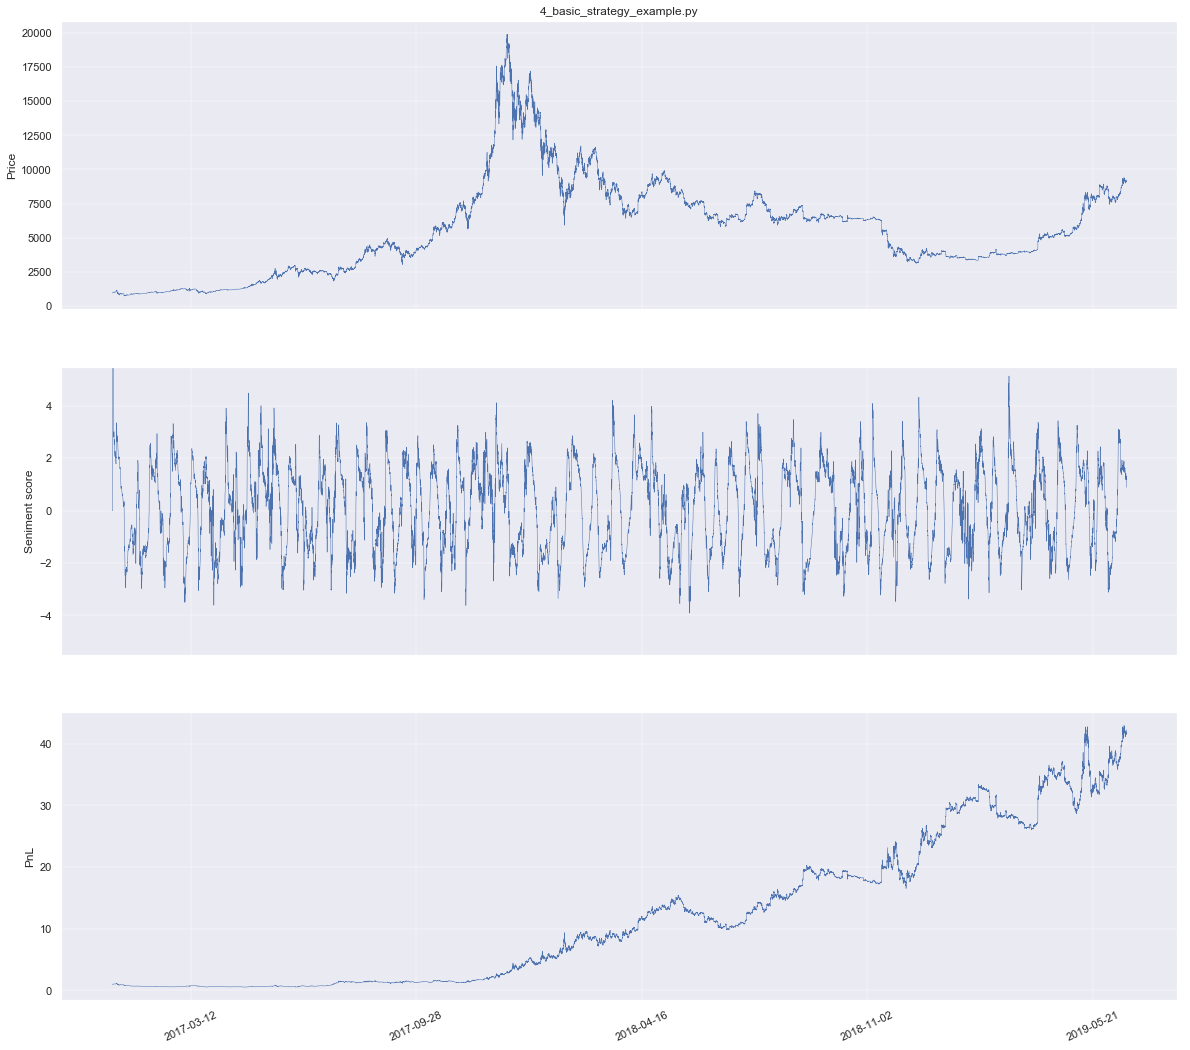

In [15]:
# set up the figure
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(20,20))

# initialise some labels for the plot
datenum_aug_data = [md.date2num(datetime.datetime.fromtimestamp(el)) for el in t_aug_data]
datenum_price_data = [md.date2num(datetime.datetime.fromtimestamp(el)) for el in t_price_data]

# plot stuff
ax[0].grid(linewidth=0.4)
ax[1].grid(linewidth=0.4)
ax[2].grid(linewidth=0.4)
ax[0].plot(datenum_price_data, price_data, linewidth=0.5)
ax[1].plot(datenum_aug_data, sent_score, linewidth=0.5)
ax[2].plot(datenum_price_data, pnl, linewidth=0.5)

# label axes
ax[0].set_ylabel("Price")
ax[1].set_ylabel("Seniment score")
ax[2].set_ylabel("PnL")
ax[1].set_ylim([-5.5, 5.5])

ax[0].set_title("4_basic_strategy_example.py")

# generate the time axes
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax[0]=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d')
ax[0].xaxis.set_major_formatter(xfmt)

# show the plot
plt.show()